<a href="https://colab.research.google.com/github/robertozerbini/blog/blob/add-license-1/Roberto_Zerbini's_Blog_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

#Curse of Dimensionality

In [6]:
distances = []
dimensions = range(1,10000,250)
for i in dimensions:
  n_dimensions = i 
  point1 = np.random.rand(n_dimensions)
  point2 = np.random.rand(n_dimensions)
  distances.append(np.linalg.norm(point1-point2))

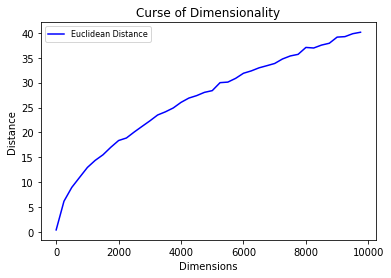

In [7]:
fig, ax = plt.subplots()
ax.plot(dimensions, distances, "b-", label = 'Euclidean Distance')
ax.set_xlabel("Dimensions")
ax.set_ylabel("Distance")
plt.legend(loc="upper left", fontsize=8)
plt.title('Curse of Dimensionality')
plt.show()

#PCA

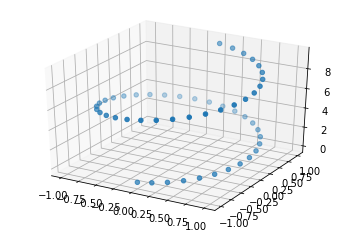

In [8]:
z = np.linspace(0, 3*np.pi)
x = np.cos(z - np.pi/2)
y = np.sin(z - np.pi/2)

X = np.array(list(zip(x,y,z)))
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.scatter3D(x, y, z)
plt.show()

In [9]:
X_centered = X - X.mean(axis=0) 
U, s, Vt = np.linalg.svd(X_centered) 
c1 = Vt.T[:, 0] 
c2 = Vt.T[:, 1]

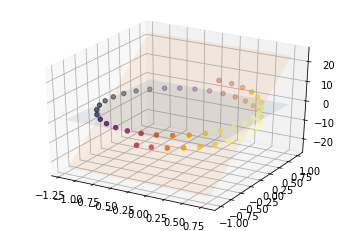

In [10]:

# Draw plane
xx, yy = np.meshgrid(np.arange(np.min(X_centered[:,0]), np.max(X_centered[:,0]), .01), np.arange(np.min(X_centered[:,1]), np.max(X_centered[:,1]), .01))

z1 = (-c1[0] * xx - c2[1] * yy ) * 1. / c1[2]
z2 = (-c2[0] * xx - c2[1] * yy ) * 1. / c2[2]
# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z1, alpha=0.09)
plt3d.plot_surface(xx, yy, z2, alpha=0.09)
plt3d.scatter(*(X_centered.T), c = X_centered[:,0], cmap='inferno', label = 'Projection')

plt.show()

In [11]:
W2 = Vt.T[:, :2] 
X2D = X_centered.dot(W2)

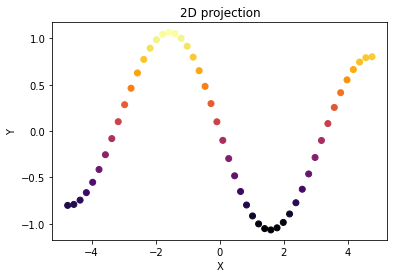

In [12]:
fig, ax = plt.subplots()
plt.title('2D projection')
ax.scatter(X2D[:,0],X2D[:,1], c = X2D[:,1], cmap='inferno', label = 'Projection') 
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

#Compression

In [13]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state = 123)

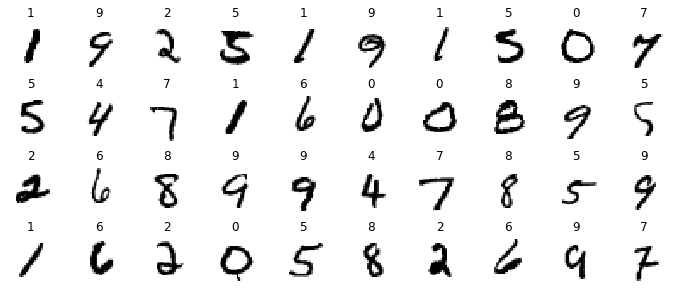

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
random_state = check_random_state(0)
permutation = random_state.permutation(X_train.shape[0])
X_train = X_train[permutation]
y_train = y_train[permutation]
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index].reshape(28,28), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [16]:
import timeit

from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, verbose = 0, random_state=123)

clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=123, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
%%timeit
clf.fit(X, y)

1 loop, best of 5: 16 s per loop


In [18]:
clf.score(X, y)

0.8939285714285714

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=784)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=784, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
print(pca.explained_variance_ratio_)

[9.74611592e-02 7.15544459e-02 6.14953098e-02 5.40338453e-02
 4.88893370e-02 4.30522703e-02 3.27826152e-02 2.88964157e-02
 2.75836420e-02 2.34214017e-02 2.10668855e-02 2.03755324e-02
 1.70706430e-02 1.69401978e-02 1.58338224e-02 1.48634490e-02
 1.31935849e-02 1.27901425e-02 1.18727249e-02 1.15293670e-02
 1.06603978e-02 1.00979434e-02 9.59151230e-03 9.09635078e-03
 8.83286819e-03 8.38818208e-03 8.09831794e-03 7.85717898e-03
 7.40262230e-03 6.90014160e-03 6.56143991e-03 6.45470291e-03
 6.00819302e-03 5.85611746e-03 5.66753559e-03 5.43470659e-03
 5.04717070e-03 4.87079420e-03 4.78955138e-03 4.67593650e-03
 4.54368629e-03 4.44918011e-03 4.18216598e-03 3.96163907e-03
 3.83707746e-03 3.75784804e-03 3.61426284e-03 3.49024600e-03
 3.38731603e-03 3.19696169e-03 3.16854028e-03 3.10144912e-03
 2.96480352e-03 2.87101448e-03 2.82513796e-03 2.69422713e-03
 2.68392305e-03 2.56509337e-03 2.53167853e-03 2.44648029e-03
 2.39702237e-03 2.38581001e-03 2.29233749e-03 2.20948989e-03
 2.13060474e-03 2.063174

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
X_compressed = pca.transform(X)
X_compressed.shape

(70000, 154)

In [23]:
clf = Perceptron(tol=1e-3, verbose = 0, random_state=123)

clf.fit(X_compressed, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=123, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
%%timeit
clf.fit(X_compressed, y)

1 loop, best of 5: 2.78 s per loop


In [25]:
clf.score(X_compressed, y)

0.8650142857142857

#Visualization

In [26]:
from sklearn.manifold import TSNE

X_compressed = PCA(n_components=30).fit_transform(X[:10000])
X2D = TSNE(n_components=2, perplexity=40, n_iter=1000).fit_transform(X_compressed)

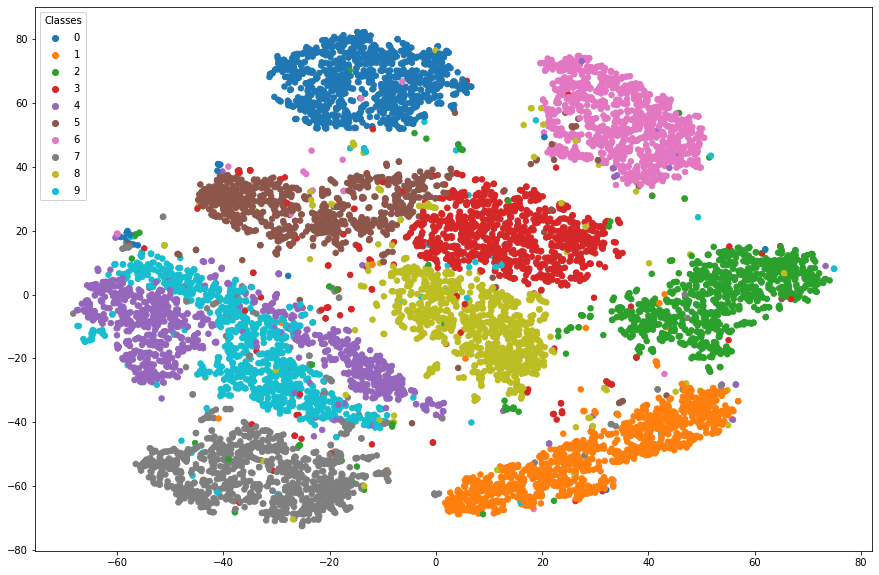

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
scatter = ax.scatter(X2D[:,0],X2D[:,1], c = np.array(y[:10000], dtype = 'int'), marker='o', cmap = 'tab10', label=np.unique(y[:10000]), s=30)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)
plt.show()